# Create Block Group Boundaries
### Author: Lane Hartwig
### Date created: 3/29/2024
### Last modified: 4/09/2024

## Import libraries

In [1]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import numpy as np
import matplotlib.pyplot as plt

## Read in data and preview

In [2]:
blocks = pd.read_csv('Data/cleanCensusBlocks.csv')
blocks['geometry'] = blocks['geometry'].apply(wkt.loads)
blocks = gpd.GeoDataFrame(blocks, geometry = 'geometry')

tracts = pd.read_csv('Data/cleanCensusTracts.csv')
tracts['geometry'] = tracts['geometry'].apply(wkt.loads)
tracts = gpd.GeoDataFrame(tracts, geometry = 'geometry')

In [3]:
blocks.head()

,statefp10,name10,blockce10,tract_bloc,geoid10,tractce10,countyfp10,geometry,coords
0,17,Block 2010,2010,6903002010,170316903002010,690300,31,"MULTIPOLYGON (((-87.62907 41.76909, -87.62905 ...","(-87.62943002730054, 41.76783399975595)"
1,17,Block 3007,3007,6809003007,170316809003007,680900,31,"MULTIPOLYGON (((-87.63412 41.77447, -87.63410 ...","(-87.63446717801119, 41.77363199955569)"
2,17,Block 3013,3013,6809003013,170316809003013,680900,31,"MULTIPOLYGON (((-87.63485 41.77263, -87.63522 ...","(-87.6358474661503, 41.773086000207584)"
3,17,Block 4019,4019,2909004019,170312909004019,290900,31,"MULTIPOLYGON (((-87.73841 41.85913, -87.73842 ...","(-87.73812675064514, 41.85993450023274)"
4,17,Block 4016,4016,2925004016,170312925004016,292500,31,"MULTIPOLYGON (((-87.73217 41.85476, -87.73226 ...","(-87.73114801329896, 41.85586899955652)"


## Create new dataframe for block groups

In [4]:
# initialize new columns
blocks['block group'] = np.nan
blocks['tract'] = np.nan
blocks['geoid'] = np.nan

# reformat columns
blocks = blocks[['name10', 'tract', 'block group', 'blockce10', 'geoid10', 'geoid', 'geometry', 'coords']]
blocks = blocks.sort_values(by=['geoid10']).reset_index().drop('index', axis=1)

# insert values for tract and groups and shorten the geoid for grouping the blocks
for i in range(len(blocks)):
    blocks['tract'][i] = "{}".format(float(str(blocks['geoid10'][i])[5:11])/100)
    blocks['block group'][i] = "Group {}".format(blocks['name10'][i][6])
    blocks['geoid'][i] = "{}".format(str(blocks['geoid10'][i])[:12])
    
# combine block group and tract columns into one for simplicity
blocks['area_name'] = np.nan
for id in range(0,len(blocks)):
  area = blocks.iloc[id][['block group','tract']]
  area[1] = '{0:g}'.format(float(area[1]))
  string = 'Block {}, Census Tract {}'.format(area[0],area[1])
  blocks['area_name'][id] = string

# group boundaries of block groups
blockGroups = blocks.dissolve(by='geoid')
blockGroups = blockGroups.sort_values(by=['geoid']).reset_index()
blockGroups = blockGroups[['area_name', 'geoid10', 'geometry', 'coords']]

# save block groups to .csv
blockGroups.to_csv('Data/cleanCensusBlockGroups.csv', index=False)

# preview data
blockGroups.head()

/var/folders/2j/4h4f5b45283891gmcdxl51q40000gn/T/ipykernel_3367/1538154397.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blocks['tract'][i] = "{}".format(float(str(blocks['geoid10'][i])[5:11])/100)
/var/folders/2j/4h4f5b45283891gmcdxl51q40000gn/T/ipykernel_3367/1538154397.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blocks['block group'][i] = "Group {}".format(blocks['name10'][i][6])
/var/folders/2j/4h4f5b45283891gmcdxl51q40000gn/T/ipykernel_3367/1538154397.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

,area_name,geoid10,geometry,coords
0,"Block Group 1, Census Tract 101",170310101001000,"POLYGON ((-87.67072 42.02115, -87.67072 42.021...","(-87.66681498774255, 42.02259400019983)"
1,"Block Group 2, Census Tract 101",170310101002000,"POLYGON ((-87.67215 42.01938, -87.67251 42.019...","(-87.67098028649627, 42.02274649995829)"
2,"Block Group 3, Census Tract 101",170310101003000,"POLYGON ((-87.66824 42.01924, -87.66824 42.019...","(-87.66455569915959, 42.021062000058706)"
3,"Block Group 1, Census Tract 102.01",170310102011000,"POLYGON ((-87.68276 42.01246, -87.68300 42.012...","(-87.68077916821706, 42.0156450004526)"
4,"Block Group 2, Census Tract 102.01",170310102012000,"POLYGON ((-87.68408 42.01515, -87.68414 42.015...","(-87.67717943099237, 42.01876899997221)"


### Separate dataframe to store area names, geoid10, and geometry

In [5]:
# geoid = blockGroups[['area_name', 'geoid10', 'geometry']]

# geoid['area_name'] = np.nan
# for id in range(0,len(geoid)):
#   area = geoid.iloc[id][['block group','tract']]
#   area[1] = '{0:g}'.format(float(area[1]))
#   string = 'Block {}, Census Tract {}'.format(area[0],area[1])
#   geoid['area_name'][id] = string
    
# geoid = geoid[['area_name', 'geoid10', 'geometry']]
# geoid.head()

## Plot data

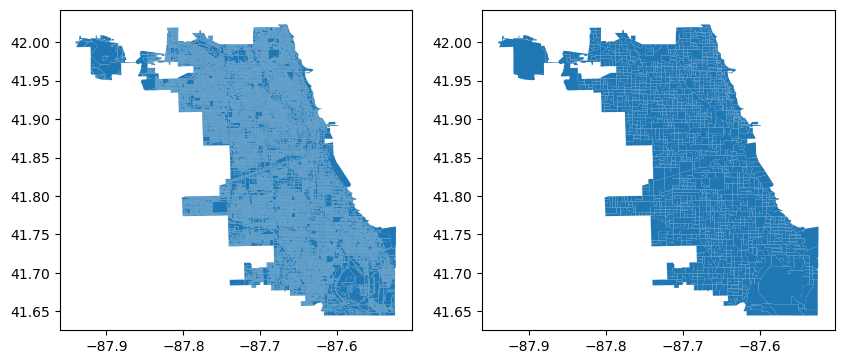

In [6]:
fig, ax = plt.subplots(ncols=2, figsize=(10,7.5))
blocks.plot(ax=ax[0])
blockGroups.plot(ax=ax[1])
plt.show()

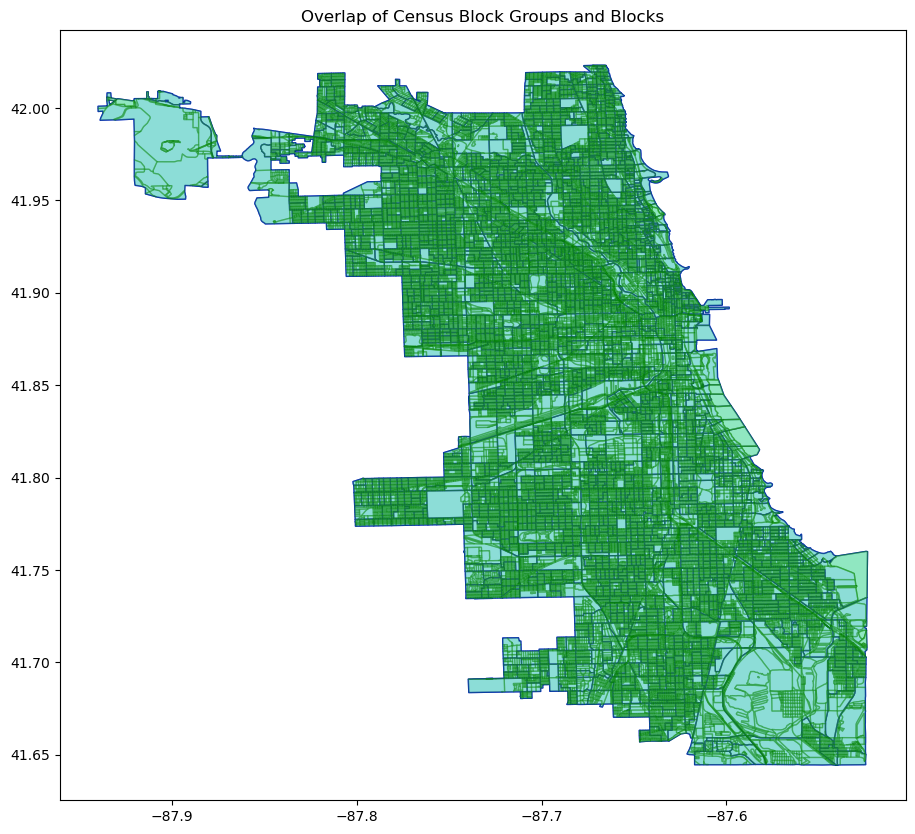

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
blockGroups.plot(ax=ax, color="lightskyblue", edgecolor="blue")
blocks.plot(ax=ax, color="palegreen", edgecolor="green", alpha=0.35)
plt.title(label="Overlap of Census Block Groups and Blocks")
plt.show()

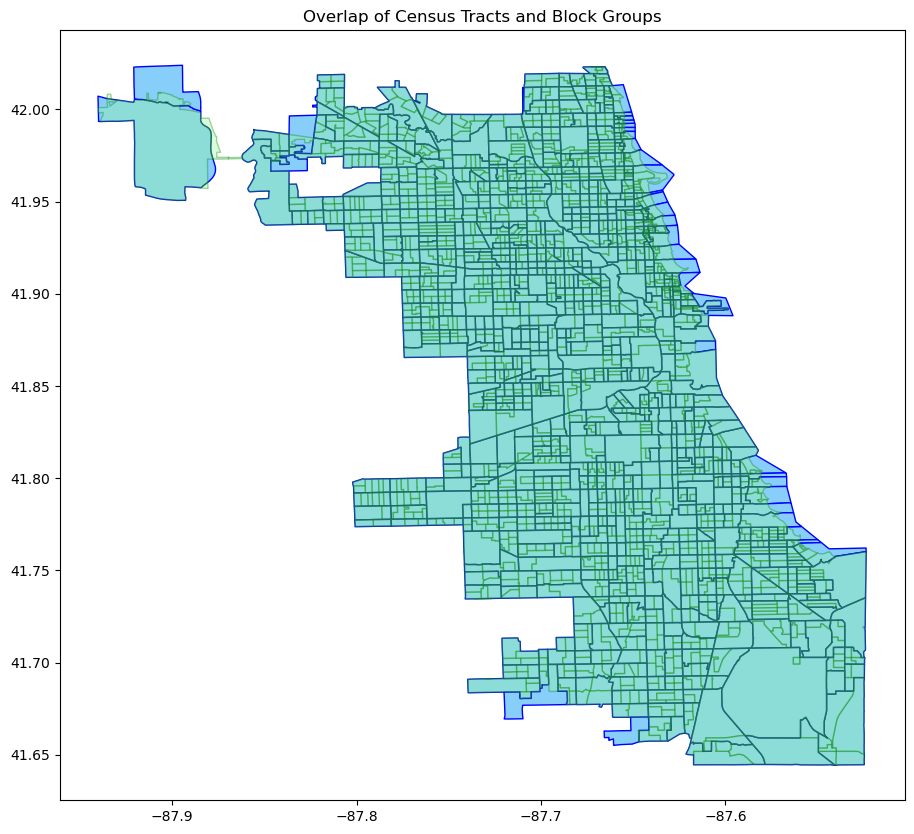

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
tracts.plot(ax=ax, color="lightskyblue", edgecolor="blue")
blockGroups.plot(ax=ax, color="palegreen", edgecolor="green", alpha=0.35)
plt.title(label="Overlap of Census Tracts and Block Groups")
plt.show()